### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

### Import Data

In [2]:
path = "../data/raw/Fraud_Data.csv"
fraud_data = pd.read_csv(path)

In [3]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


### EDA

#### Data Cleaning

In [4]:
# 1. Handle Missing Values
missing_summary = fraud_data.isnull().sum()
print("Missing values:\n", missing_summary)

Missing values:
 user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


In [5]:
# 2. Remove Duplicates
# Duplicate rows in this dataset often represent bot activity or data glitches.
duplicate_count = fraud_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
fraud_data.drop_duplicates(inplace=True)

Number of duplicate rows: 0


In [ ]:
# 3. Correct Data Types
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

#### Univariate Analysis

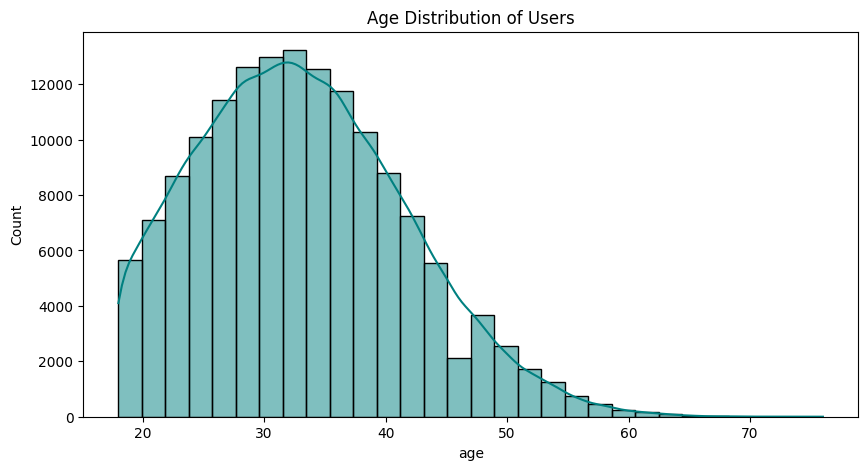

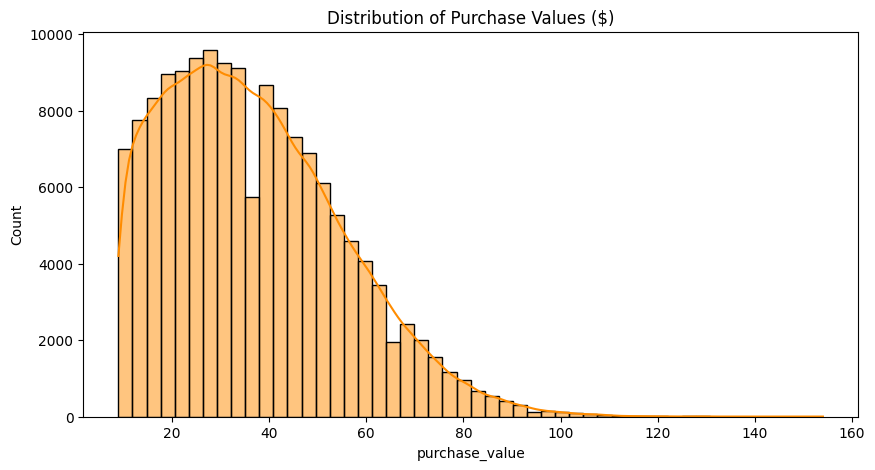

In [8]:
# Distribution of Age
plt.figure(figsize=(10, 5))
sns.histplot(fraud_data['age'], bins=30, kde=True, color='teal')
plt.title('Age Distribution of Users')
plt.show()

# Distribution of Purchase Value
plt.figure(figsize=(10, 5))
sns.histplot(fraud_data['purchase_value'], bins=50, kde=True, color='darkorange')
plt.title('Distribution of Purchase Values ($)')
plt.show()

#### Bivariate Analysis

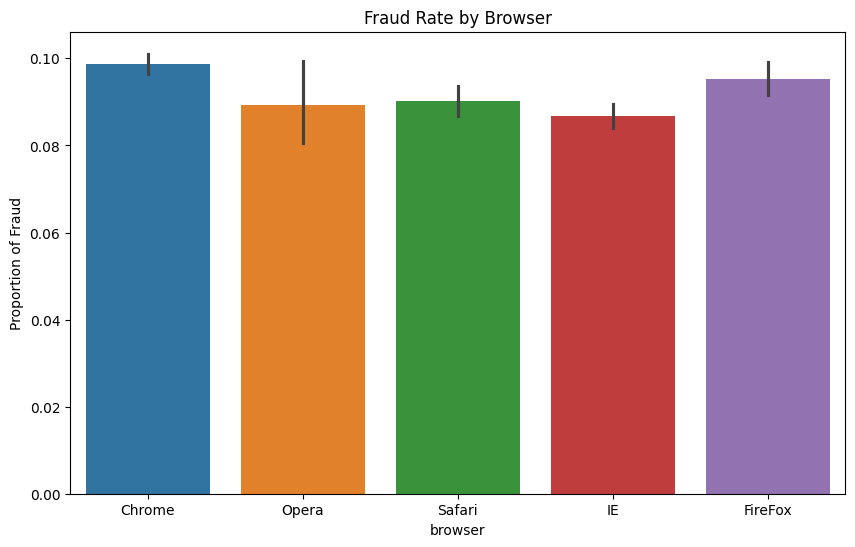

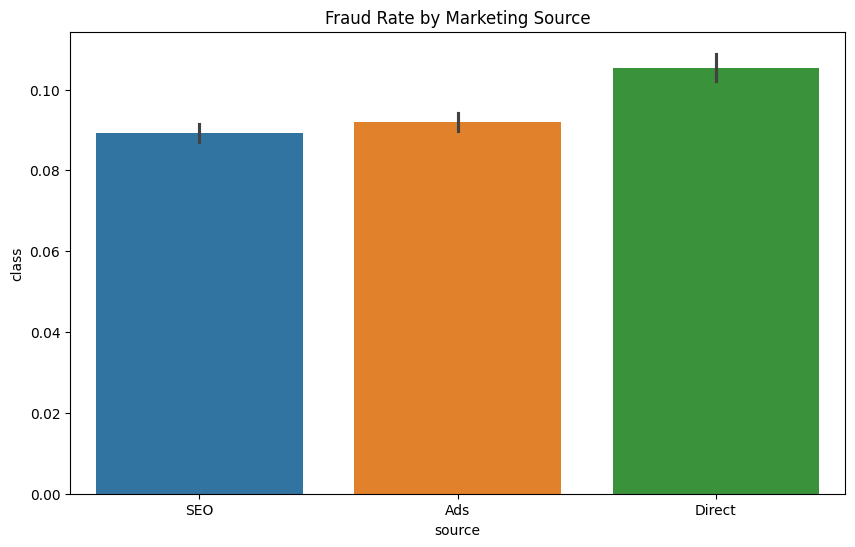

In [15]:
# Fraud rate by Browser
plt.figure(figsize=(10, 6))
sns.barplot(x='browser', y='class', data=fraud_data, hue ='browser')
plt.title('Fraud Rate by Browser')
plt.ylabel('Proportion of Fraud')
plt.show()

# Fraud rate by Source
plt.figure(figsize=(10, 6))
sns.barplot(x='source', y='class', data=fraud_data, hue='source')
plt.title('Fraud Rate by Marketing Source')
plt.show()

#### Class Distribution Analysis

Non-Fraud (0): 136961
Fraud (1): 14151
Fraud Percentage: 9.36%


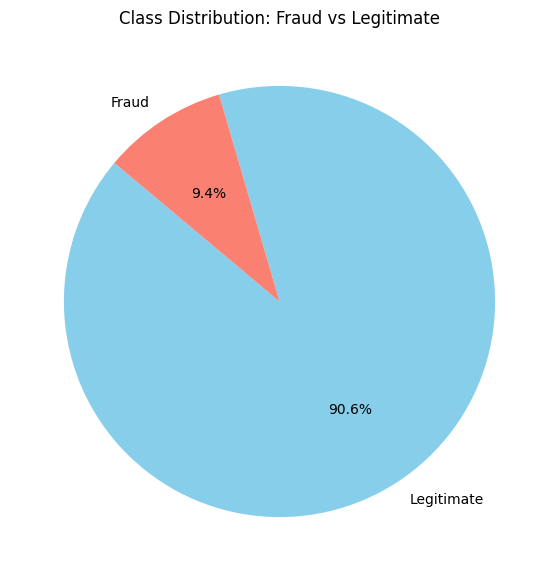

In [16]:
# Count the classes
counts = fraud_data['class'].value_counts()
percent_fraud = (counts[1] / counts.sum()) * 100

print(f"Non-Fraud (0): {counts[0]}")
print(f"Fraud (1): {counts[1]}")
print(f"Fraud Percentage: {percent_fraud:.2f}%")

# Pie chart for visualization
plt.figure(figsize=(7, 7))
plt.pie(counts, labels=['Legitimate', 'Fraud'], autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=140)
plt.title('Class Distribution: Fraud vs Legitimate')
plt.show()

In [19]:
output_dir = '../data/processed'
# Save the Fraud Data with integrated Geolocation and Features
fraud_data.to_csv(f'{output_dir}/fraud_data_cleaned.csv', index=False)